In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, load_model

In [2]:
PATH_MODEL = 'saved_models/model_fashion_mnist.h5'

In [3]:
# load mnist data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# divide by 255 (rgb color)
x_train, x_test = x_train/255, x_test/255

# preview data
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [4]:
# convert data from 2D to 3D for convolution; height, width, color
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

# preview x data
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [5]:
# get & display number of classes
k_train, k_test = len(set(y_train)), len(set(y_test))
print('y_train classes: ', k_train)
print('y_test classes: ', k_test)

y_train classes:  10
y_test classes:  10


In [6]:
# build model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k_train, activation='softmax')(x)

model = Model(i, x)

In [7]:
# compile & fit model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

# save model
# model.save(PATH_MODEL)

# load model
# model = load_model(PATH_MODEL)

Epoch 1/15


2022-08-26 20:37:23.916718: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 9s 5ms/step - loss: 0.5284 - accuracy: 0.8033 - val_loss: 0.4198 - val_accuracy: 0.8361
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3659 - accuracy: 0.8622 - val_loss: 0.3413 - val_accuracy: 0.8700
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3187 - accuracy: 0.8805 - val_loss: 0.3348 - val_accuracy: 0.8773
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2853 - accuracy: 0.8915 - val_loss: 0.3071 - val_accuracy: 0.8859
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2618 - accuracy: 0.9008 - val_loss: 0.2946 - val_accuracy: 0.8930
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2380 - accuracy: 0.9113 - val_loss: 0.3019 - val_accuracy: 0.8937
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2199 - accuracy: 0.9175 - val_loss: 0.3183 - val_accuracy: 0.89

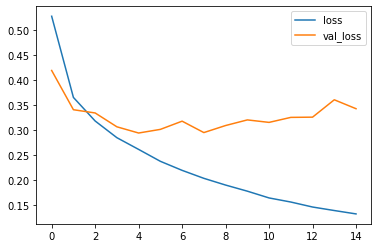

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

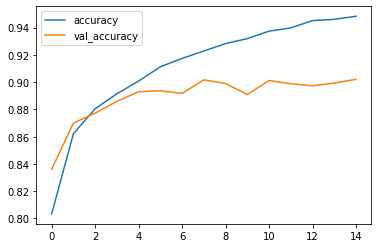

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()